# Logistic regression basics

We've now cleaned up the data and created the new data set *cr_loan_clean*.

Interest rates are easy to understand, but what how useful are they for predicting the probability of default?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_fscore_support, roc_curve, roc_auc_score, confusion_matrix, accuracy_score

In [2]:
cr_loan_clean = pd.read_csv("cr_loan_clean.csv", index_col=0)

In [3]:
# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate']]
y = cr_loan_clean[['loan_status']]

# Create and fit a logistic regression model
clf_logistic_single = LogisticRegression()
clf_logistic_single.fit(X, np.ravel(y))

# Print the parameters of the model
print(clf_logistic_single.get_params())

# Print the intercept of the model
print(clf_logistic_single.intercept_)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[-4.45806941]


# Multivariate logistic regression

Generally, we won't use only *loan_int_rate* to predict the probability of default. We will want to use all the data you have to make predictions.

With this in mind, from the *cr_loan_clean* data. Will this model differ from the first one? For this, we can easily check the *.intercept_* of the logistic regression.

In [4]:
# Create X data for the model
X_multi = cr_loan_clean[['loan_int_rate','person_emp_length']]

# Create a set of y data for training
y = cr_loan_clean[['loan_status']]

# Create and train a new logistic regression
clf_logistic_multi = LogisticRegression(solver='lbfgs').fit(X_multi, np.ravel(y))

# Print the intercept of the model
print(clf_logistic_multi.intercept_)

[-4.2166144]


The new clf_logistic_multi model has an *.intercept_* value closer to zero. This means the log odds of a non-default is approaching zero.

# Creating training and test sets

The training set is used to make predictions, while the test set is used for evaluation. Without evaluating the model, we have no way to tell how well it will perform on new loan data.

In addition to the intercept_, which is an attribute of the model, *LogisticRegression()* models also have the *.coef_* attribute. This shows how important each training column is for predicting the probability of default.

In [5]:
# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate','person_emp_length','person_income']]
y = cr_loan_clean[['loan_status']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Print the models coefficients
print(clf_logistic.coef_)

[[ 8.45011624e-02 -1.65754410e-02 -3.68156128e-05]]


The more positive the value, the more it predicts defaults. Look at the value for *loan_int_rate*.

# Changing coefficients

In [6]:
y_train.shape

(17677, 1)

In [7]:
# Create the X1, and X2 data sets
X1 = cr_loan_clean[['person_income', 'person_emp_length', 'loan_amnt']]
X2 = cr_loan_clean[['person_income', 'loan_percent_income', 'cb_person_cred_hist_length']]

# Use test_train_split to create the training and test sets
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=.4, random_state=123)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=.4, random_state=123)

# Print the first five rows of each training set
print(X1_train.head())
print(X2_train.head())

# Create and train a model on the first training data
clf_logistic1 = LogisticRegression(solver='lbfgs').fit(X1_train, np.ravel(y_train))

# Create and train a model on the second training data
clf_logistic2 = LogisticRegression(solver='lbfgs').fit(X2_train, np.ravel(y_train))

# Print the coefficients of each model
print(clf_logistic1.coef_)
print(clf_logistic2.coef_)

       person_income  person_emp_length  loan_amnt
20877          62839               15.0       9000
1776           19200                3.0       2000
11443          56000               10.0      10000
24407          72000                3.0       9000
2525           20800                0.0       3000
       person_income  loan_percent_income  cb_person_cred_hist_length
20877          62839                 0.14                          10
1776           19200                 0.10                           4
11443          56000                 0.18                           2
24407          72000                 0.13                           6
2525           20800                 0.14                           4
[[-4.10158666e-05 -2.67140555e-08  1.07807851e-04]]
[[-2.21538020e-05  9.33549899e-11 -1.60597470e-09]]


The coefficient for the *person_income* changed when we changed the data from X1 to X2. This is a reason to keep most of the data, because the models will learn differently depending on what data they're given!

# One-hot encoding credit data

Once the new columns have been created using one-hot encoding, we can concatenate them with the numeric columns to create a new data frame which will be used for predicting probability of default.

In [8]:
# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
cred_str_onehot = pd.get_dummies(cred_str)

# Union the one-hot encoded columns to the numeric ones
cr_loan_prep = pd.concat([cred_num, cred_str_onehot], axis=1)

# Print the columns in the new data set
print(cr_loan_prep.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')


# Predicting probability of default

In [9]:
# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(cr_loan_prep, y, test_size=.4, random_state=123)

# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   loan_status  prob_default
0            0      0.130012
1            0      0.059753
2            0      0.129564
3            0      0.456963
4            0      0.376612


# Default classification reporting

It's time to take a closer look at the evaluation of the model. Here is where setting the threshold for probability of default will help we analyze the model's performance through classification reporting.

In [10]:
# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Print the row counts for each loan status
print(preds_df['loan_status'].value_counts())

# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

0    11228
1      558
Name: loan_status, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.80      0.98      0.88      9177
     Default       0.73      0.16      0.26      2609

    accuracy                           0.80     11786
   macro avg       0.76      0.57      0.57     11786
weighted avg       0.79      0.80      0.75     11786



It looks like almost all of our test set was predicted to be non-default. The recall for defaults is 0.16 meaning 16% of our true defaults were predicted correctly.

# Selecting report metrics

In [11]:
# Print all the non-average values from the report
print(precision_recall_fscore_support(y_test,preds_df['loan_status']))

(array([0.80370502, 0.72580645]), array([0.98332788, 0.15523189]), array([0.8844891 , 0.25576255]), array([9177, 2609]))


In [12]:
# Print the first two numbers from the report
print(precision_recall_fscore_support(y_test,preds_df['loan_status'])[0:1])

(array([0.80370502, 0.72580645]),)


# Visually scoring credit models

In ROC charts, the X and Y axes are two metrics: the false positive rate (fall-out), and the true positive rate (sensitivity).

0.8000169692855931


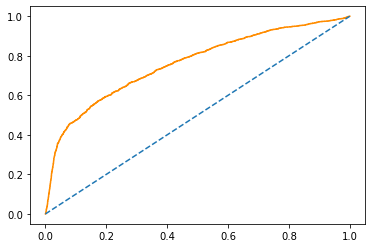

In [13]:
# Create predictions and store them in a variable
preds = clf_logistic.predict_proba(X_test)

# Print the accuracy score the model
print(clf_logistic.score(X_test, y_test))

# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc = roc_auc_score(y_test, prob_default)

The accuracy for this model is about 80% and the AUC score is 80% too. Notice that what the ROC chart shows us is the tradeoff between all values of our false positive rate (fallout) and true positive rate (sensitivity).

# Thresholds and confusion matrices

Recall the confusion matrix as shown here:

<img src="3_9_conf_ex2.png">

In [14]:
# Print the confusion matrix
print(confusion_matrix(y_test,preds_df['loan_status']))

# Recall threshold 0.5
print(precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1])

[[9024  153]
 [2204  405]]
0.1552318896128785


In [15]:
# Set the threshold for defaults to 0.4
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Print the confusion matrix
print(confusion_matrix(y_test,preds_df['loan_status']))

# Recall for threshold 0.4
print(precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1])

[[8489  688]
 [1450 1159]]
0.44423150632426217


The value for default recall at the threshold of 0.4 is actually pretty high! We can check out the non-default recalls as well to see how the threshold affected those values.

# How thresholds affect performance

Setting the threshold to 0.4 shows promising results for model evaluation. Now we can assess the financial impact using the default recall which is selected from the classification reporting using the function *precision_recall_fscore_support()*.

For this, we will estimate the amount of unexpected loss using the default recall to find what proportion of defaults we did not catch with the new threshold. This will be a dollar amount which tells you how much in losses we would have if all the unfound defaults were to default all at once.

In [16]:
# Average Loan Amounts
avg_loan_amnt = cr_loan_clean['loan_amnt'].mean()

# Store the number of loan defaults from the prediction data
num_defaults = preds_df['loan_status'].value_counts()[1]

# Store the default recall from the classification report
default_recall = precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1]

# Calculate the estimated impact of the new default recall rate
print(avg_loan_amnt * num_defaults * (1 - default_recall))

9837534.240898542


By our estimates, this loss would be around $9.8 million. That seems like a lot!

# Threshold selection

We know there is a trade off between metrics like default recall, non-default recall, and model accuracy.

In [17]:
thresh = np.arange(0.2,0.675,0.025)
def_recalls = []
nondef_recalls = []
accs = []

for t in thresh:
    preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > t else 0)
    def_recalls.append(precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1])
    nondef_recalls.append(precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][0])
    accs.append(accuracy_score(y_test,preds_df['loan_status']))

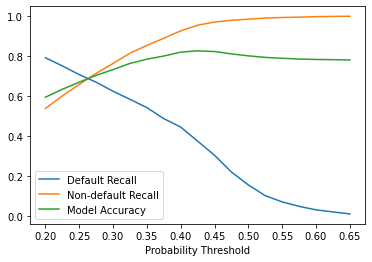

In [18]:
ticks = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65]
plt.plot(thresh,def_recalls)
plt.plot(thresh,nondef_recalls)
plt.plot(thresh,accs)
plt.xlabel("Probability Threshold")
plt.xticks(ticks)
plt.legend(["Default Recall","Non-default Recall","Model Accuracy"])
plt.show()

The point where all three lines converge it is when the threshold is approximately 0.275, but declaring all loans about 0.275 to be a default is probably not practical.